 

<h1 align="center">Regression.</h1> 


<img src="N3_Regression/facades.jpg" alt="Drawing" style="width: 500px"/>

This round considers machine learning (ML) methods that use the features of a data point to predict the value of a **numeric** label $y \in \mathbb{R}$. ML applications involving numeric label values are often referred to as **regression problems**. You will apply some basic **regression methods** to predict the median apartment value of a given neighborhood in an area. 

**Regression methods** learn a useful hypothesis map or predictor function $h(\mathbf{x})$ by minimizing the average loss incurred on some labeled datapoints (the training set). The function value $h(\mathbf{x})$ is used as a prediction (estimate or guess) for the numeric label $y$ of a data point based on the features $\mathbf{x}$. What sets regression methods apart from **classification methods** is mainly the choice for the loss function. As a point in case, there are regression and classification methods that use the same hypothesis space of prediction functions (see linear regression and logistic regression) but differ in the loss function used to assess the quality of a predictor function. 

The various regression methods differ in their choice of allowed predictor functions (hypothesis space) and loss function (the quality measure used to rank predictors). These different combinations offer different tradeoffs between **computational complexity, robustness (against outliers), and prediction error**. A widely-used regression method is linear regression which uses linear predictor maps (linear hypothesis space) and the squared error loss. This combination is computationally appealing as the resulting method can be implemented using efficient gradient-based optimization algorithms (see [Ch. 5, MLBook]. However, using the squared error loss makes the method sensitive to outliers in the data. We will then see how another regression method that uses a different loss function is more robust against outliers. This improved statistical robustness comes at the cost of increased computational complexity. 

Learning Goals

After completing this round, you should

- be able to formulate applications as regression problems by identifying data points, their features, and labels. 
- be able to represent features and labels of data points as `NumPy arrays`.
- be able to use the methods for linear regression provided by the Python package `scikit-learn`.
- know about the effect of varying number of features on the training error. 
- know about the effect of varying size of training set on the training error. 
- know different statistical and computational properties of squared error loss and the Huber loss. 

A Real-Estate Regression Problem 

Assume you have secured an internship at an office of a real estate investment fund. You have been placed in the research team, and your first task is to develop a ML method for predicting the median house price for different neighborhoods. Some of your collegeaus have collected a dataset $\mathcal{D}$ containing information about $20$ different neighborhoods. 

We consider each neighborhood as an invididual datapoint. Each datapoint (neighborhood) is characterized by several features such as the average number of rooms in the apartments, the percentage of buildings constructed before 1970 in the neighborhood, as well as eight experimental features designed by your colleagues. The quantity of interest or label for each datapoint is the median house price for a neighborhood. Some real-estate experts have determined the median apartment price for each neighborhood in the dataset $\mathcal{D}$. The salary for a real-estate expert costs a fortune. Therefore, we want to use ML to learn a predictor function $h(\mathbf{x})$ that is able to predict the median apartment price $y$ from the features $\mathbf{x}$ of that neighborhood. 

The Data

Let us summarize the above ML problem: Datapoints represent neighborhoods that are characterized by $n$ different features that we stack into a feature vector $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)^{T}$. The features are properties of a neighborhood that can be determined easily in an automated fashion. Each datapoint (neighborhood) has a numeric label $y$ which is the (true) median apartment price of the neighborhood. 

Finding out the label for a datapoint requires real-estate experts who are costly. This round studies ML methods that use the labeled datapoints in our dataset $\mathcal{D}$ to learn a predictor $h(\mathbf{x})$. This predictor function is used to predict the median apartment value of an arbitrary neighborhood (also outside our dataset $\mathcal{D}$) by using the features $\mathbf{x}$ of that neighborhood. 

To learn a predictor $h(\mathbf{x})$ we use our dataset $\mathcal{D}$ consisting of $m=20$ neighborhoods for which the label values have been determined. In ML terms, our dataset is a labelled dataset (since we know the label values) $$\mathcal{D} = \big(\mathbf{x}^{(1)}, y^{(1)}\big), \big(\mathbf{x}^{(2)}, y^{(2)}\big), \ldots, \big(\mathbf{x}^{(m)}, y^{(m)}\big).$$ 
Here, $\mathbf{x}^{(i)} = \big(x_1^{(i)}, x_2^{(i)}, \ldots, x_n^{(i)} \big)^T$ and $y^{(i)}$ denote the feature vector and label, respectively, of the $i$-th data point (neighborhood). It will be convenient to collect the feature vectors of our dataset $\mathcal{D}$ in the rows of the **feature matrix** $\mathbf{X}$,


\begin{equation}
  \mathbf{X} = \begin{pmatrix}
                  \mathbf{x}^{(1)} & \mathbf{x}^{(2)} & \ldots & \mathbf{x}^{(m)}
               \end{pmatrix}^T 
             = \begin{pmatrix}
                  x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)} \\
                  x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)} \\
                  \vdots & \vdots & \ddots & \vdots \\
                  x_1^{(m)} & x_2^{(m)} & \ldots & x_n^{(m)}
               \end{pmatrix} \in \mathbb{R}^{m \times n}
\end{equation}

The $i$-th row of the feature matrix $\mathbf{X}$ contains the feature vector of the $i$-th data point. 
Furthermore, it will be convenient to collect the labels of our dataset $\mathcal{D}$ in a **label vector** $\mathbf{y}$, 

\begin{equation}
  \mathbf{y} = \begin{pmatrix}
                  {y}^{(1)} \\ {y}^{(2)} \\ \vdots \\ {y}^{(m)} 
               \end{pmatrix} \in \mathbb{R}^m
\end{equation}
The $i$-th entry of the label vector is the label of the $i$:th data point. 

The Python package [`NumPy`](https://numpy.org/) provides methods for manipulating numeric arrays which are stored as [`ndarray`](https://numpy.org/doc/stable/reference/arrays.ndarray.html) objects. These objects are used to represent mathematical objects such as vectors or matrices. In particular, we can  store a feature matrix, whose rows are the feature vectors of datapoints, as a 2-dimensional `ndarray` of shape `(m,n)`. That is, it has `m` rows (data points) and `n` columns (features). This `ndarray` format for matrices is also used by the ML methods provided by the Python package [`scikit-learn`](https://scikit-learn.org/stable/). 

If we were to apply the mathematical formulation fully in NumPy, we would define the label vector as a 2-dimensional `ndarray` of shape `(m,1)` that corresponds to a column vector. However, most methods in Scikit-learn operate under the assumption that the label vector is a 1-dimensional `ndarray` of shape `(m,)`, so we adopt this practice instead.

<a id='handsondata'></a>
<div class=" alert alert-info">
    
    
Demo. Load the data.
    
In the code snippet below, we create a function for loading the feature matrix `X` and label vector `y` for the apartment value problem. The function returns the feature matrix `X` of shape `(m,n)` and the label vector `y` of shape `(m,)`.
    
In most cases, it is not necessary to create a separate function for loading the data if the procedure is this simple. However, it is convenient in this case as we will reload the data before many tasks to make sure that the dataset has not been modified. 
    
At the end of the cell, we use the newly defined function to load the data and print the shape of the feature matrix and label vector.
</div>

In [1]:
# Import basic libraries needed in this round
import numpy as np 
import pandas as pd  
from matplotlib import pyplot as plt

def load_housing_data(m=20, n=10):
    # Load dataframe from csv
    df = pd.read_csv("N3_Regression/helsinki_apartment_prices.csv", index_col=0)  
    
    # Extract feature matrix and label vector from dataframe
    X = df.iloc[:m,:n].to_numpy()
    y = df.iloc[:m,-1].to_numpy().reshape(-1)
    
    return X, y
    
# Load the housing data
X, y = load_housing_data()
print(X.shape, y.shape)

(20, 10) (20,)


Visualize Data

Scatter plots visualize data points by representing them as "dots" in the two-dimensional plane. Scatter plots can help to develop an intuition for the relation between features and labels of data points. 


<a id='drawplot'></a>
<div class=" alert alert-info">
    
 Demo. Scatterplots of Features and Labels
    
The code below generates scatterplots of the the real-estate dataset. We generate a separate scatterplot for each of the first three features $x_{1},x_{2},x_{3}$ of a datapoint. Each scatterplot depicts the datapoints by dots whose coorindates are given by the label $y$, representing the median value of apartments, and one of the first three features $x_1, x_2, x_3$ of a datapoint. Scatterplots allow for an analysis of possible relationships between the features and the label of datapoints. Generating and inspecting scatterplots of data is a very useful first step when starting on a ML problem.
</div>

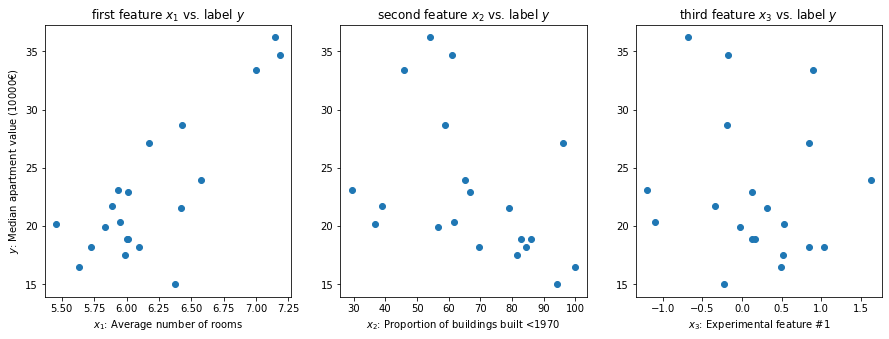

In [2]:
# Create a figure with 3 subplots in 1 row 
fig, ax = plt.subplots(1, 3, figsize=(15,5))

# Create first subplot 
ax[0].scatter(X[:,0], y)
ax[0].set_title('first feature $x_{1}$ vs. label $y$')
ax[0].set_xlabel('$x_{1}$: Average number of rooms')
ax[0].set_ylabel('$y$: Median apartment value (10000€)')

# Create second subplot 
ax[1].scatter(X[:,1], y)
ax[1].set_xlabel('$x_{2}$: Proportion of buildings built <1970')
ax[1].set_title('second feature $x_{2}$ vs. label $y$')

# Create second subplot 
ax[2].scatter(X[:,2], y)
ax[2].set_xlabel('$x_{3}$: Experimental feature #1')
ax[2].set_title('third feature $x_{3}$ vs. label $y$')

# Display the figure containing two subplots 
plt.show()

By looking at the scatterplots above, we can see that the median apartment value seems to be related to at least some of the features. As one would expect, the average number of rooms seems to be positively correlated with the median value. In contrast, the first experimental feature $x_3$ does not seem very informative. We can only hope that the research team has done a better job with the rest of the experimental features.\
Scatter plots can also be handy for detecting strongly correlated features, e.g., by plotting ${x}_{1}$ vs ${x}_{2}$, and so on. This might be an important step in the modelling process, as some models are harder to train and interpret in the presence of strongly correlated features. However, visual inspection becomes impractical as the number of features grows large. 

 Linear Regression 

As discussed in Notebook 2, given limited computational resources, ML methods cannot search for the best predictor function $h(\mathbf{x})$ over the entire space of all possible functions that map the feature vector $\mathbf{x}$ to a predicted label $\hat{y}$. This set of functions is simply too large. 

Every practical ML method uses a small subset of candidate predictor functions. This subset of candidate predictor functions is referred to as the **hypothesis space** or **model** underlying the ML method. Chapter 3 of details how some of the most widely-used ML methods are obtained for specific choices for the hypothesis space. 

One of the most important example of a hypothesis space is the space of linear functions, 
\begin{equation*}
h^{(w_{0},\mathbf{w})}(\mathbf{x}) = w_0 + \mathbf{w}^{T} \mathbf{x} = w_0 + \sum_{i=1}^n w_i x_i. 
\tag{Eq1}
\end{equation*}
These linear functions are parametrized by the weight vector $\mathbf{w}=\big(w_1, w_2, \ldots, w_n \big)^T$ and the intercept term $w_0$. Each linear function ${\rm (Eq1)}$ is fully determined by the values of the weights and intercept. 

The linear function ${\rm (Eq1)}$ adds to the intercept term a weighted sum of the features $x_1, x_2, \ldots, x_n$ using the weights $w_1, w_2, \ldots, w_n$. Using linear predictor functions can be expected to work well if the features $\mathbf{x}$ of a data point are (at least approximatley) linearly related to the label $y$. 

Now that we have defined the form of the functions in the hypothesis space, we want to fit the model by finding the predictor function that results in the best predictions on the training data. 

 Training a linear regression model by minimizing the average loss

A loss function $\mathcal{L}(\hat{y}, y)$ quantifies the quality of a single prediction $\hat{y}=h(\mathbf{x})$ by comparing it to the true label $y$ of a data point. The basic idea is that good predictions will only incur a small loss, whereas bad predictions will incur a large loss. 

Given a set of labelled data and a loss function, we can evaluate the fit of a predictor function on the dataset $\mathcal{D}$ by computing the **average loss**, 

\begin{equation}
\label{eq:emprisk} \tag{Eq2}
    \mathcal{E} \big(h(\mathbf{x})|\mathcal{D} \big) = (1/m) \sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, {y}^{(i)}).
\end{equation}

A popular choice for the loss function in regression problems is the **squared error loss**

\begin{equation}
    \mathcal{L}(\hat{y}, y) = (y - \hat{y})^2.
\end{equation}

Inserting the squared error loss into \eqref{eq:emprisk} results in the **mean squared error** (MSE)

\begin{equation}
    \mathcal{E}\big(h(\mathbf{x})|\mathcal{D}\big) = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - \hat{y}^{(i)})^2 = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - h(\mathbf{x}^{(i)}))^2 = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - w_0 - \mathbf{w}^T\mathbf{x}^{(i)})^2.
\end{equation}

It seems quite natural to learn a predictor function $h \in \mathcal{H}$ for a function that minimizes the average loss over the training set, 

\begin{equation}
\hat{h} = \mbox{argmin}_{h\in \mathcal{H}}  \mathcal{E} \big(h(\mathbf{x})|\mathcal{D} \big). 
\end{equation}

For linear predictor maps $h^{(w_{0},\mathbf{w})}$, which are parametrized by the weight vector $\mathbf{w}$ and intercept $w_{0}$, the optimal weight vector is obtained as 
\begin{equation}
\hat{w}_{0},\hat{\mathbf{w}} = \mbox{argmin}_{w_{0},\mathbf{w}}  \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - w_0 - \mathbf{w}^T\mathbf{x}^{(i)})^2.
 \tag{Eq3}
\end{equation}


<a id='drawplot'></a>
<div class=" alert alert-info">
    
 Demo. The Linear Regression Class.

The code snippet below demonstrates how to use the Python package [`scikit-learn`](https://scikit-learn.org/stable/) to learn a linear predictor for the median appartment price of a neighborhood based on its features. To start with, we will only use the first two features $x_1$ (average number of rooms in apartments) and $x_2$ (percentage of buildings constructed before 1970) of a datapoint to predict its label $y$ (median appartment price). 
    
The class [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) provided by `scikit-learn` allows to learn a linear predictor map that incurs a minimum average squared error loss on given labeled datapoints (the training data). The use of this class is as follows: 

1. We store the feature vectors (using $n=2$ features for each datapoint) and labels for the datapoints in our real-estate dataset $\mathcal{D}$ into the numpy arrays `X` and `y`. 
    
2. We create an instance (or object) of the `LinearRegression` class and name it `reg`. This is done with the statement `LinearRegression()`. The constructor of `LinearRegression()` allows to specificy different parameters. For example, the parameter `fit_intercept` determines if an intercept term $w_{0}$ is used or not. When setting `fit_intercept=False`, the intercept term is fixed to $w_{0}=0$. 

3. After creating the `LinearRegression` object `reg`, we learn the optimal weights and intercept by minimizing the mean squared error incurred when predicting the labels in `y` using the feature vectors in `X`. This is done using the method `reg.fit()`. 

4. The optimal weights and intercept, computed by the method `reg.fit()`, are stored in the attributes `reg.coef_` and `reg.intercept_`. 


</div> 

In [3]:
from sklearn.linear_model import LinearRegression
from IPython.display import display, Math

# Load housing data with two features
X, y = load_housing_data(n=2)

# Create the linear regression object
reg = LinearRegression(fit_intercept=True) 

# Fit the linear regression model  
reg.fit(X, y)

# Get the optimal weight vector w of the fitted model 
w_opt = reg.coef_

# Get the optimal intercept of the fitted model  
w_intercept = reg.intercept_

# Print the optimal weight vector 
display(Math(r'$\mathbf{w}_{\rm opt} ='))
print(w_opt)

# Print the optimal intercept
display(Math(r'${w}_{0 \rm opt} ='))
print(w_intercept)

<IPython.core.display.Math object>

[ 9.97587284 -0.10507286]


<IPython.core.display.Math object>

-31.82904528362892


The Training Error

The optimization problem ${\rm (Eq3)}$ is known as empirical risk minimization (ERM). Solving the ERM problem for linear regression provides the optimum weights $\hat{\mathbf{w}}$ and optimal intercept $\hat{w}_{0}$. The average loss incurred by these optimum weights is often referred to as the **training error** of linear regression. 

<a id='drawplot'></a>
<div class=" alert alert-info">
    
 Demo. Calculating the (Optimal) Training Error for Linear Regression
   
After learning the optimal weights for a linear predictor we can now apply this linear predictor to any datapoint with known features. In particular, we can apply the linear predictor to the datapoints used to learning the optimal weights. 
    
1. We use the method `reg.predict(X)` to compute the predictions obtained by applying the linear predictor with weighs `reg.coeff_` and intercept `reg.intercept_` to the features stored in `X`. This function takes as input a feature matrix with `m` rows of data points and returns a vector of predicted labels of shape `(m,)`. The resulting predicted labels are stored in the numpy array `y_pred`. 
 
2. After computing the predicted labels `y_pred`, we calculate the training error by comparing the predictions to the true labels `y`. Since the training error is in this case defined as the MSE, we will use the `mean_squared_error(y, y_pred)` function from the `metrics` module in Scikit-learn to calculate it.

</div>

In [4]:
from sklearn.metrics import mean_squared_error
 
# Calculate the predicted labels of the data points in the training set
y_pred = reg.predict(X)

# Calculate the MSE of the true and predicted labels of the training set
training_error = mean_squared_error(y, y_pred)

# Print training error 
print("\nThe resulting mean squared error (training error) is ", training_error)


The resulting mean squared error (training error) is  7.693037221421179


We have now trained our first model on the dataset and obtained a value for the training error. Next, we might want to try out to add some other features to the dataset. By comparing the training errors of the optimal predictor of models trained on different features, we can find the model that fits the training data the best.

Your task below is to try out a set of models for median apartment value prediction that utilize a different number of features in the original dataset. In the context of this problem, it is of particular interest to examine if the inclusion of the experimental features developed by the research team results in better predictions on the training data.

<a id='varying_features'></a>
<div class=" alert alert-warning">
    
 Student Task. Varying the Number of Features. 
    
This task requires you to train 10 different hypothesis spaces or models. We index these ten models using the number $r=1,\ldots,10$. The $r$-th model is given by all linear predictor functions that only use first $r$ features of a datapoint. The first model ($r=1$) uses only the feature $x_1$. The second model ($r=2$) uses the features $x_1,x_2$ and so on. The last model ($r=10$) uses ten features $x_1,x_2,\ldots,x_{10}$. 
    
For each model $r=1,\ldots,10$, you should
    
- Create a linear regression model with an intercept term (`fit_intercept=True`) and train the model on the data using only the $r$ first features. For example, if $r=4$, you should train the model using a feature matrix containing only the features $x_1,x_2,x_3,x_4$.
    
    
- Use the trained model to calculate the predicted labels `y_pred` of the dataset used for training the model. Notice that the feature matrix used for predicting labels must have the same number of features as the matrix used for training. 
    

- Calculate the mean squared error of `y_pred` in comparison to `y`, and store this error in the $r$th element of the array `linreg_error`. Remember that indexing starts at 0 in Python, so the $r$th element is found at index $r-1$ in the array.


You can use the above demo code snippets to complete this student task. The main challenge is to iterate over the different values of $r$, and to figure out how to modify the feature matrix to only contain the first $r$ features during the $r$th iteration.
    
**Hint:** Use a for loop to iterate over the number of features $r=1,\ldots,10$.
    
</div>

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error             

max_r = 10

# Load the dataset using 10 features 
X, y = load_housing_data(n=10)
  
# Vector for storing the training error for each r
linreg_error = np.zeros(max_r)    

### STUDENT TASK ###
for i in range(1,max_r+1):
    X, y = load_housing_data(n=i)    
    reg = LinearRegression(fit_intercept=True) 
    reg.fit(X, y)
    w_opt = reg.coef_
    w_intercept = reg.intercept_
    y_pred = reg.predict(X)
    training_error = mean_squared_error(y, y_pred)
    np.put(linreg_error,[i-1],[training_error])
#raise NotImplementedError()



In [6]:
# Perform some sanity checks on the result
assert linreg_error.shape == (max_r,), "'linreg_error' has the wrong shape."
assert linreg_error[9] < 0.8 * linreg_error[2], "training errors are not correct"
assert linreg_error[5] > linreg_error[6], "training errors are not correct"

print('Sanity check passed!')


Sanity check passed!


Next, we print and plot the training errors in order to assess how well the different models fit the data:

Training errors (rounded to 2 decimals): 
 [12.05  7.69  7.66  7.29  7.2   5.63  5.54  5.43  5.38  5.38]


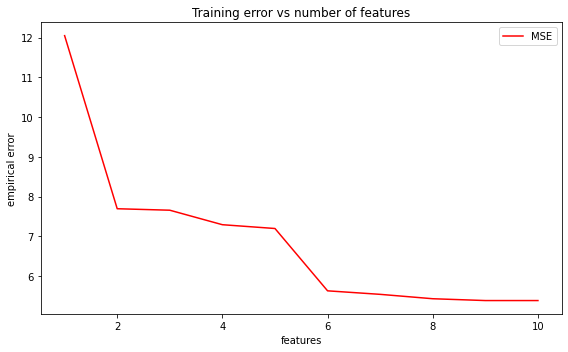

In [7]:
# Print the training errors
print(f"Training errors (rounded to 2 decimals): \n {np.round(linreg_error, 2)}")

# create a numpy array "r_values" containing the values 1,2...,max_r 
r_values = np.linspace(1, max_r, max_r, endpoint=True)
# create a plot object which can be accessed using variables "fig" and "axes"
fig, axes = plt.subplots(1,1, figsize=(8, 5))
# add a curve representing the average squared error for each choice of r 
axes.plot(r_values, linreg_error, label='MSE', color='red')
# add captions for the horizontal and vertical axes 
axes.set_xlabel('features')
axes.set_ylabel('empirical error')
# add a title to the plot 
axes.set_title('Training error vs number of features')
axes.legend()
plt.tight_layout()
plt.show()

If you have completed the task correctly, you should see plot similar to this one:

<img src="N3_Regression/numoffeatures.png" alt="Drawing" style="width: 500px"/>

As you can see, the training error is decreasing with respect to the number of features in the linear regression model. Based on this, it would seem that including more experimental features results in learning better predictor functions. In particular, using all 10 features of data points results in the smallest training error. 

It is tempting to conclude that we should use all available features of neighborhoods to predict their median apartment price. However, keep in mind that the actual purpose of the model is to predict the median apartment value of neighborhoods that are **not** in the training set $\mathcal{D}$. As such, a low error on the training set is not necessarily a reliable indicator for a good performance on datapoints (neighborhoods) outside the training set $\mathcal{D}$. We will see in Notebook 4 of our course that if a predictor function incurs a small (even close to zero) error on a training set, does not necessarily imply accurate predictions on data points outside the training set. 

Your next task is to explore the effect of using a different number of data points for training the model.

<a id='varying_features'></a>
<div class=" alert alert-warning">

 Student Task. Varying Number of Data Points.
    
In this task, your objective is to train 10 different models that use the $m$ first data points of the dataset, with $m$ ranging from 1 to 10. That is, you should first train a model on the data using only the data point $\mathbf{x}^{(1)}$, then a model using the data points $\mathbf{x}^{(1)},\mathbf{x}^{(2)}$, and so forth, up until the model that uses the 10 first data points $\mathbf{x}^{(1)},\mathbf{x}^{(2)},\ldots,\mathbf{x}^{(10)}$. You should also calculate and store the training error for each model in an array `train_error`.
    
The solution to this exercise is very similar to the one above, with the important difference that you are now varying the number of data points that you use to train the model on each iteration. This means that you must modify the feature matrix in a different manner to achieve the correct result.
    
</div>

In [8]:
# maximum number of data points
max_m = 10     

# Load the dataset using n=2 features 
X, y = load_housing_data(n=2)   


# Array in which to store the training errors of the different number of data points
train_error = np.zeros(max_m)         

### STUDENT TASK ###

for i in range(1,max_m+1):
    X, y = load_housing_data(m=i,n=2)   
    reg = LinearRegression(fit_intercept=True) 
    reg.fit(X, y)
    w_opt = reg.coef_
    w_intercept = reg.intercept_
    y_pred = reg.predict(X)
    training_error = mean_squared_error(y, y_pred)
    np.put(train_error,[i-1],[training_error])

# YOUR CODE HERE


#raise NotImplementedError()

In [9]:
# Perform sanity checks on the results
assert train_error.shape == (10,), "'train_error' has wrong dimensions."
assert train_error[0] < 100 * train_error[3], "training errors are not correct"
assert train_error[2] > train_error[1], "training errors are not correct"

print('Sanity checks passed!')

Sanity checks passed!


Next, we print and plot the training errors in order to assess how well the different models fit the data:

Training Errors (Rounded to 2 decimals): 
 [0.   0.   0.   0.21 0.43 2.86 3.   7.63 6.87 6.72]


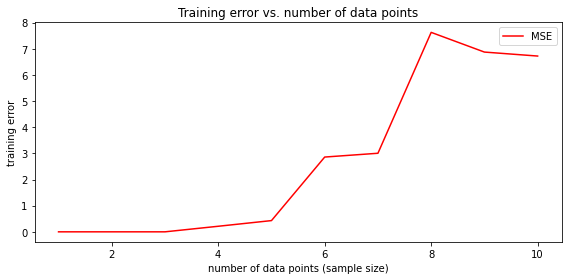

In [10]:
# Print training errors
print(f"Training Errors (Rounded to 2 decimals): \n {np.round(train_error, 2)}")

# create a numpy array "m_values" containing the values 1,2...,max_m
m_values = np.arange(1, max_m + 1)
# create a plot object which can be accessed using variables "fig" and "axes"
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
# add a curve representing the average squared error for each choice of m
axes.plot(m_values, train_error, label='MSE', color='red')
# add captions for axes of the plot 
axes.set_xlabel('number of data points (sample size)')
axes.set_ylabel('training error')
# add title for the plot 
axes.set_title('Training error vs. number of data points')
axes.legend()
plt.tight_layout()
# display the plot 
plt.show()

If you have completed the task correctly, you should see plot similar to this one:

<img src="N3_Regression/numofdatapoints.png" alt="Drawing" style="width: 500px"/>


As you can see, using more data points to fit a linear predictor results in an increasing training error. Why do you think increasing sample size leads to an increase in the training error?

(Non-) Robustness Against Outliers

Suppose that the domain experts work very long hours, and are often tired when entering apartment evaluation data into the dataset. Sometimes the tiredness causes careless mistakes that result in abnormally high or low values for the median apartment value of some neighborhood. The resulting data points differ significantly from the intact data points and are called **outliers**.

In general we would like to have ML methods that are robust against outliers. Having some datapoints in the training set that are corrupted should not significantly affect the learnt predictor function (see ${\rm (Eq3)}$). It turns out that using the squared error loss to learn a linear predictor yields a ML method that is quite sensitive to outliers. Intuitively, having an outlier results in a significantly different predictor function since otherwise the loss for the outlier would be too large. This is due to using the square $(y-\hat{y})^2$ of the prediction error $(y-\hat{y})$ which "amplifies" the effect of an outlier in the training data. We will see below that replacing the squared error loss with another loss function to learn a linear predictor provides more robustness against outliers. 

<a id='drawplot'></a>
<div class=" alert alert-info">
    
 Demo. Loading corrupted data.

The code below provides a function that loads a single feature $x_1$ and the label $y$ for all datapoints (neighborhood) in our dataset $\mathcal{D}$. The resulting features and labels are stored in numpy arrays `X` and `y`. We then corrupt one datapoint in $\mathcal{D}$ by replacing the true label value with the random value $80$. The features and labels for the resulting corrupted dataset $\mathcal{D}'$ are stored in the numpy arrays `X_cor` and `y_cor`. Both datasets are then visualized by separate scatterplots. 
</div>

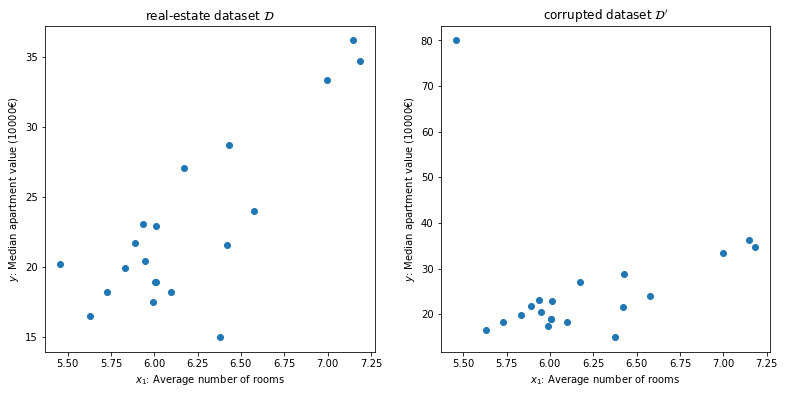

In [11]:
def load_corrupted_data():
    X, y = load_housing_data(n=1)
    
    # perturb the label of the data point with lowest x_1
    y[np.argmin(X)] = 80
    
    return X, y

X, y = load_housing_data(n=1)
X_cor, y_cor = load_corrupted_data()

# Plot the real and the corrupted datasets for comparison

fig, ax = plt.subplots(1, 2,  figsize=(13,6))   # create a figure with two horizontal subplots
ax[0].scatter(X, y)
ax[0].set_xlabel('$x_1$: Average number of rooms')
ax[0].set_ylabel("$y$: Median apartment value (10000€)")
ax[0].set_title("real-estate dataset $\mathcal{D}$")
ax[1].scatter(X_cor, y_cor)
ax[1].set_xlabel('$x_1$: Average number of rooms')
ax[1].set_ylabel("$y$: Median apartment value (10000€)")
ax[1].set_title("corrupted dataset $\mathcal{D}'$")
plt.show()

<a id='drawplot'></a>
<div class=" alert alert-info">
    
 Demo. (Non-)Robustness of Linear Regression with Squared Error Loss 
    
The following code learns two linear predictors using linear regression applied to two datasets $\mathcal{D}$ and $\mathcal{D}'$. The dataset $\mathcal{D}'$ is obtained from $\mathcal{D}$ by corrupting the label of a single datapoint in $\mathcal{D}$. We illustrate the learnt predictor maps along with the datasets in two plots. Consider how the erroneous data point in the corrupted data has a significant effect on the optimal predictor function that minimizes the MSE.
</div>

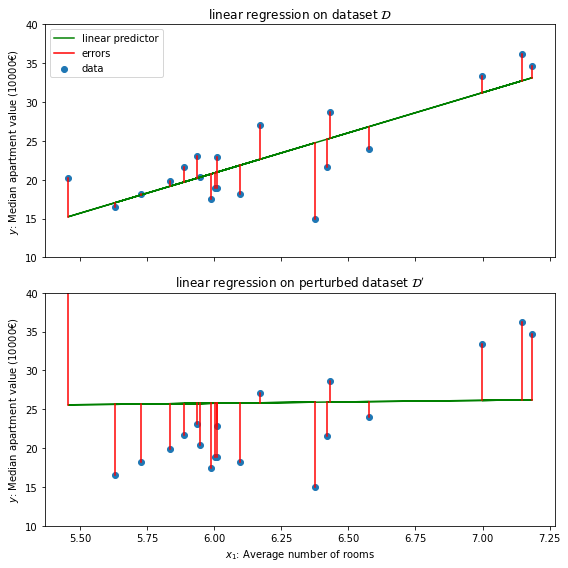

optimal weight w_opt by fitting to (training on) clean training data :  10.352233546854801
optimal weight w_opt by fitting to (training on) corrupted training data :  0.36741720196224614


In [12]:
# learn a linear predictor map by minimizing MSE incurred on the dataset D
reg = LinearRegression(fit_intercept=True) 
reg = reg.fit(X, y)                       
y_pred = reg.predict(X)                   

# learn a linear predictor map by minimizing MSE incurred on corrupdated dataset D'
reg_cor = LinearRegression(fit_intercept=True)
reg_cor = reg_cor.fit(X_cor, y_cor)   
y_pred_cor = reg_cor.predict(X_cor)   

# Create a plot object 
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 8))   # create a figure with two vertical subplots 

# Plot a subplot 1 with original data
axes[0].scatter(X, y, label='data')  # Plot data points
axes[0].plot(X, y_pred, color='green', label='linear predictor')  # Plot linear predictor

# For each data point, add line indicating prediction error
axes[0].plot((X[0], X[0]), (y[0], y_pred[0]), color='red', label='errors')  # Add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1])  # Same X
    lineYdata = (y[i+1], y_pred[i+1])  # Different Y
    axes[0].plot(lineXdata, lineYdata, color='red')

# Set axes title, labels and legend
axes[0].set_title('linear regression on dataset $\mathcal{D}$')
axes[0].set_ylabel("$y$: Median apartment value (10000€)")
axes[0].set_ylim(10,40)  # set y-axis range to 0 till 100
axes[0].legend()


# Plot a subplot 2 with corrupted data
axes[1].scatter(X_cor, y_cor, label='data') 
axes[1].set_ylim(10,40)  
axes[1].plot(X, y_pred_cor, color='green')  

# plot prediction errors
for i in range(len(X)):
    lineXdata = (X[i], X[i])  
    lineYdata = (y_cor[i], y_pred_cor[i]) 
    axes[1].plot(lineXdata, lineYdata, color='red')

# set axes title, labels and legend
axes[1].set_title('linear regression on perturbed dataset $\mathcal{D}{\'}$')
axes[1].set_xlabel('$x_1$: Average number of rooms')
axes[1].set_ylabel("$y$: Median apartment value (10000€)")

fig.tight_layout()
plt.show()

print("optimal weight w_opt by fitting to (training on) clean training data : ", reg.coef_[0])
print("optimal weight w_opt by fitting to (training on) corrupted training data : ", reg_cor.coef_[0])


The figure above shows that the erroneous data point significantly affects the optimal predictor function obtained by minimizing the MSE on $\mathcal{D}'$. in other words, the linear predictor learnt by minimizing the MSE on the dataset $\mathcal{D}'$ depends heavily on a single outlier. We can therefore expect this predictor function to incur a large prediction error for datapoints outside $\mathcal{D}'$. A simple yet powerful approach to obtain more robustness against outliers is to replace the squared error loss with a different loss function which we introduce next. 

The Huber Loss

Learning a linear predictor function by minimizing the squared error loss $(h(\mathbf{x}) - y)^{2}$ forces learnt predictor $h(\mathbf{x})$ to not be too far away from any data point in the training set including the outlier. This, in turn, means that if we replace a single data point by an outlier far away, then also the predictor function must change substantially to keep the squared error small. 
 
It turns out that using a different loss function to learn a linear predictor can make the learning robust against few outliers. One such loss function is known as the ["Huber loss"](https://en.wikipedia.org/wiki/Huber_loss) $\mathcal{L}(\hat{y},y)$, and is defined as 

\begin{equation}
\mathcal{L}(y,\hat{y}) = \begin{cases} (1/2) (y-\hat{y})^{2} & \mbox{ for } |y-\hat{y}| \leq   \varepsilon \\ 
\varepsilon(|y-\hat{y}| - \varepsilon/2) & \mbox{ else. }\end{cases} 
\tag{Eq4}
\end{equation}

**The Huber loss is robust to outliers since the errors for which $|y - \hat{y}| > \varepsilon$ are not squared**. Thus, these data points have a smaller effect on the total loss over the dataset and hence the resulting fit. Note that the Huber loss contains a parameter $\varepsilon$, which has to be adapted to the application at hand. A principled approach to choose the value of $\varepsilon$ is to try out several candidate values and then pick the one resulting in the best overall performance. This overall performance of a ML method can be measured by one of the validation techniques discussed in Notebook 4 of this course. 

The Huber loss ${\rm (Eq4)}$ includes two important special cases. The first special case is when $\varepsilon$ is chosen very large (the precise value depending on the value range of the features and labels), such that the condition $|y-\hat{y}| \leq \varepsilon$ is always satisfied. In this case, the Huber loss is equivalent to the squared error loss $(y-\hat{y})^{2}$ (with an additional factor 1/2). 

Another special case of the Huber loss ${\rm (Eq4)}$ is obtained when $\varepsilon$ is very small (close to $0$) such that the condition $|y-\hat{y}| \leq \varepsilon$ is never satisfied. In this case, the Huber loss reduces to the absolute loss $|y - \hat{y}|$ (scaled by a factor $\varepsilon$).

<img src="N3_Regression/huber1.png" alt="Drawing" style="width: 800px"/>

<a id='drawplot'></a>
<div class=" alert alert-info">

 Demo. Squared Error and Huber Loss
<p>
The code below plots the squared error loss and the Huber loss for different choices of the parameter $\varepsilon$. Note that the Huber loss reduces to the squared error loss for a sufficiently large value of the parameter $\varepsilon$.
</p>
</div>

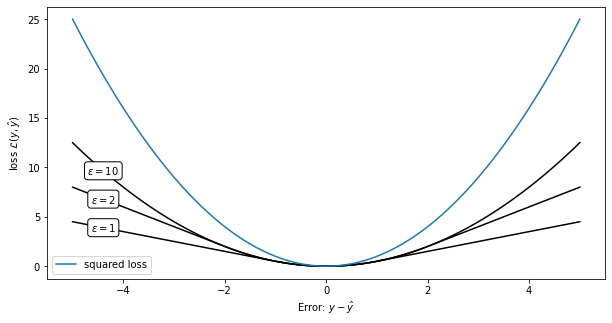

In [13]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
import matplotlib.pyplot as plt


#------------------------------------------------------------
# Define the Huber loss
def HuberLoss(pred_error, epsilon):
    # pred_error - prediction error y-y_pred
    # epsilon - parameter epsilon 𝜀 
    pred_error = abs(pred_error)
    flag = (pred_error > epsilon)
    return (~flag) * (0.5 * pred_error ** 2) - (flag) * epsilon * (0.5 * epsilon - pred_error)

#------------------------------------------------------------
# Plot for several values of epsilon
fig = plt.figure(figsize=(10, 5)) # set figure size
ax = fig.add_subplot(111) # add 1 subplot

pred_error = np.linspace(-5, 5, 100) # create linear space from -5 to 5 with 100 steps

for epsilon in (1, 2, 10): # loop through values 1, 2, 10
    loss = HuberLoss(pred_error, epsilon)
    ax.plot(pred_error, loss, '-k') # plot x and y

    if epsilon > 10:
        s = r'\infty' # set s to infinity sign (string format)
    else:
        s = str(epsilon) # set s to string of number epsilon

    ax.text(pred_error[6], loss[6], '$\epsilon=%s$' % s,
            ha='center', va='center',
            bbox=dict(boxstyle='round', ec='k', fc='w')) # add test to each line

ax.plot(pred_error, np.square(pred_error),label="squared loss") # plot the sqared loss (blue line)

ax.set_xlabel(r'Error: $y - \hat{y}$') # set x labels
ax.set_ylabel(r'loss $\mathcal{L}(y,\hat{y})$') # set y label
ax.legend() # show legend in plot
plt.show() # show the plot

<a id='drawplot'></a>
<div class=" alert alert-warning">
    
 Student task. Robustness of Linear Regression with Huber Loss.

In this task, your objective is to train separate Huber regression model on the original and corrupted data and use these models to calculate the predicted labels on the datasets. You should store the predicted labels for the model using the original data in the variable `y_pred`, and the predicted labels for the corrupted data in the variable `y_pred_cor`.
    
A Huber Regression model is implemented in the Scikit-learn class `HuberRegressor`. The methods of the `HuberRegressor` class are constructed similarly to the `LinearRegression` class, so training the models and calculating the predicted labels is done using the same function names `.fit()` and `.predict()`.
    
Use the default $\varepsilon$ value ($\varepsilon$=1.35) defined in [`HuberRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn-linear-model-huberregressor) class.
</div>

In [68]:
from sklearn import linear_model
from sklearn.linear_model import HuberRegressor

X, y = load_housing_data(n=1)
X_cor, y_cor = load_corrupted_data()   # read in 20 data points with single feature x_1 and label y 

### STUDENT TASK ###

reg = HuberRegressor().fit(X, y)
reg.predict(X[:])

reg_cor = HuberRegressor().fit(X_cor, y_cor)
reg_cor.predict(X_cor[:])

# YOUR CODE HERE
#raise NotImplementedError()

print("optimal weight w_opt by fitting on clean data : ", reg.coef_[0])
print("optimal weight w_opt by fitting on perturbed data : ", reg_cor.coef_[0])

optimal weight w_opt by fitting on clean data :  10.988807856687522
optimal weight w_opt by fitting on perturbed data :  10.988804256507342


In [66]:
# Perform some sanity checks on the output
assert y_pred.shape == (20,), "The shape of y_pred is wrong!"
assert y_pred_cor.shape == (20,), "The shape of y_pred_cor is wrong!"

print("Sanity checks passed!")

Sanity checks passed!


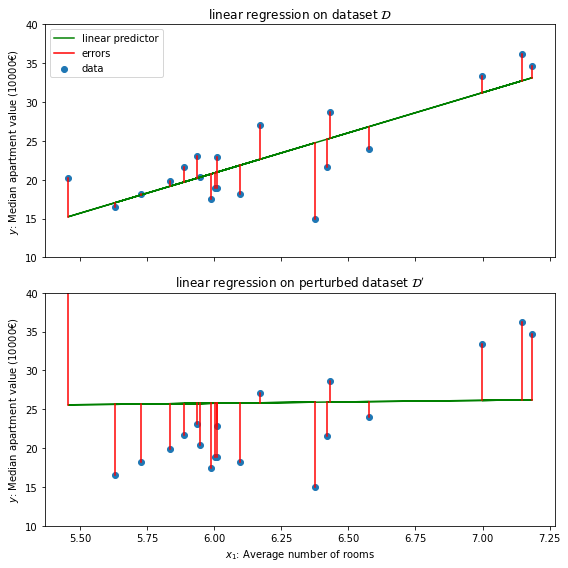

optimal weight w_opt by fitting to (training on) clean training data :  10.988807856687522
optimal weight w_opt by fitting to (training on) corrupted training data :  10.988804256507342


In [67]:
# Create a plot object 
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 8))   # create a figure with two vertical subplots 

# Plot a subplot 1 with original data
axes[0].scatter(X, y, label='data')  # Plot data points
axes[0].plot(X, y_pred, color='green', label='linear predictor')  # Plot linear predictor

# For each data point, add line indicating prediction error
axes[0].plot((X[0], X[0]), (y[0], y_pred[0]), color='red', label='errors')  # Add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1])  # Same X
    lineYdata = (y[i+1], y_pred[i+1])  # Different Y
    axes[0].plot(lineXdata, lineYdata, color='red')

# Set axes title, labels and legend
axes[0].set_title('linear regression on dataset $\mathcal{D}$')
axes[0].set_ylabel("$y$: Median apartment value (10000€)")
axes[0].set_ylim(10,40)  # set y-axis range to 0 till 100
axes[0].legend()


# Plot a subplot 2 with corrupted data
axes[1].scatter(X_cor, y_cor, label='data') 
axes[1].set_ylim(10,40)  
axes[1].plot(X, y_pred_cor, color='green')  

# plot prediction errors
for i in range(len(X)):
    lineXdata = (X[i], X[i])  
    lineYdata = (y_cor[i], y_pred_cor[i]) 
    axes[1].plot(lineXdata, lineYdata, color='red')

# set axes title, labels and legend
axes[1].set_title('linear regression on perturbed dataset $\mathcal{D}{\'}$')
axes[1].set_xlabel('$x_1$: Average number of rooms')
axes[1].set_ylabel("$y$: Median apartment value (10000€)")

fig.tight_layout()
plt.show()

print("optimal weight w_opt by fitting to (training on) clean training data : ", reg.coef_[0])
print("optimal weight w_opt by fitting to (training on) corrupted training data : ", reg_cor.coef_[0])

We can see that the predictors trained on the original and perturbed data are very similar when using the Huber loss, in contrast to the large difference in the predictors that minimize the mean-squared error.

Key takeaways

- **Regression problems** consist in predicting the numeric label $y$ of a data point based on its features $\mathbf{x}$. 



- A widely used hypothesis space for regression methods is the space of linear functions $\hat{y} = h(\mathbf{x}) = w_{0}+w_1x_1 + w_2x_2 + \ldots + w_nx_n$. 


- Regression methods using linear functions work well if there is an (approximately) linear relation between features and label of datapoints.

- A large class of regression methods uses the squared error loss $\mathcal{L}(y,\hat{y}) = (y-\hat{y})^{2}$. These methods learn a predictor function $h(\mathbf{x})$ by minimizing the average (mean) squared error (MSE)
\begin{equation}
   \frac{1}{m} \sum_{i=1}^m (y^{(i)} - \hat{y}^{(i)})^2 =  \frac{1}{m} \sum_{i=1}^m \big(y^{(i)} - h\big(\mathbf{x}^{(i)}\big)\big)^2, 
\end{equation}
on a labeled dataset. 

- The minimum MSE achieved by the optimal linear predictor is referred as the training error of a linear regression method. The training error depends on the number of features used to characterize datapoints as well as on the number of datapoints used for the training set. 

- Another popular choice for the loss function in regression problems is the Huber loss,
\begin{equation}
\mathcal{L}(y,\hat{y}) = \begin{cases} (1/2) (y-\hat{y})^{2} & \mbox{ for } |y-\hat{y}| \leq   \varepsilon \\ 
\varepsilon(|y-\hat{y}| - \varepsilon/2) & \mbox{ else. }\end{cases}
\end{equation}

- ML methods that use the Huber loss instead of the squared error loss tend to be more robust against the presence of few outliers in the training dataset.

Quiz Questions

<a id='QuestionN3_1'></a>
<div class=" alert alert-warning">
    <p><b>Student Task.</b> Question N3.1. </p>

 <p>When is a machine learning problem called a regression problem?</p>

<ol>
  <li> When the quantity of interest (the label) is a numeric quantity. </li>
  <li> When the data is stored in a spreadsheet.</li>
  <li> When the method uses audio data.  </li>
  <li> When the quantity of interest takes on only a finite number of different values (e.g. "-1","0" or "4").
</ol> 

</div>

In [69]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_N3_Q1  = 1

# YOUR CODE HERE
#raise NotImplementedError()

In [70]:
# This cell is for tests

assert answer_N3_Q1 in [1,2,3,4], '"answer_N3_Q1" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='QuestionN3_2'></a>
<div class=" alert alert-warning">
    <p><b>Student Task.</b> Question N3.2.</p>
    <p> What is the effect of using more features for learning (fitting) a linear predictor by minimizing the average squared error on training data?</p>
    <ol>
      <li> The training error increases. </li>
      <li> The training error decreases. </li>
      <li> The training error does not depend on the number of features. </li>
    </ol> 
</div>

In [71]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_N3_Q2  = 2

# YOUR CODE HERE
#raise NotImplementedError()

In [72]:
# This cell is for tests

assert answer_N3_Q2 in [1,2,3], '"answer_N3_Q2" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='QuestionN3_3'></a>
<div class=" alert alert-warning">
    <p><b>Student Task.</b> Question N3.3.</p>
    <p> How does the resulting regression method differ when using either squared error or Huber loss?</p>
    <ol>
      <li> Using Huber loss makes the resulting method more robust against outliers, i.e., the learned predictor does not vary too much if the dataset includes a few outliers.  </li>
      <li> Using squared error loss makes the resulting method more robust against outliers.  </li>
    </ol> 
</div>

In [74]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_N3_Q3  = 1

# YOUR CODE HERE
#raise NotImplementedError()

In [75]:
# This cell is for tests

assert answer_N3_Q3 in [1,2], '"answer_N3_Q3" Value should be an integer between 1 and 2.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='QuestionN3_4'></a>
<div class=" alert alert-warning">
    <p><b>Student Task.</b> Question N3.4.</p>
    <p> For a fixed dataset, will regression models fitted with Huber loss and squared error loss always differ from one another?</p>
    <ol>
      <li> Yes, because in contrast to square loss, Huber loss for $|y-\hat{y}| \leq   \varepsilon$ has an additional constant factor 1/2: $\frac{1}{2}(y-\hat{y})^2$.</li>
      <li> No, they produce essentially the same results. </li>
      <li> No, not always. If there are no outliers (measured/quantified with respect to the parameter epsilon $\varepsilon$) Huber loss behaves like a squared error loss. </li>
    </ol> 
</div>

In [76]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_N3_Q4  = 3

# YOUR CODE HERE
#raise NotImplementedError()

In [77]:
# This cell is for tests

assert answer_N3_Q4 in [1,2,3], '"answer_N3_Q4" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


Sanity check tests passed!
